In [159]:
#####################################################################################################
######################### CLASSIFIED DATA SET  #####################################################
#####################################################################################################


In [160]:
##########################################################################
############### Part I - Importing 
##########################################################################


import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
df = pd.read_csv('KNN_Project_Data')

In [162]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [163]:
#####################################################################
########################### Part II - Duplicates
#####################################################################

df[df.duplicated()]                                   #### no duplicates found

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS


In [164]:
####################################################################
############## Part III - Missing Values
####################################################################


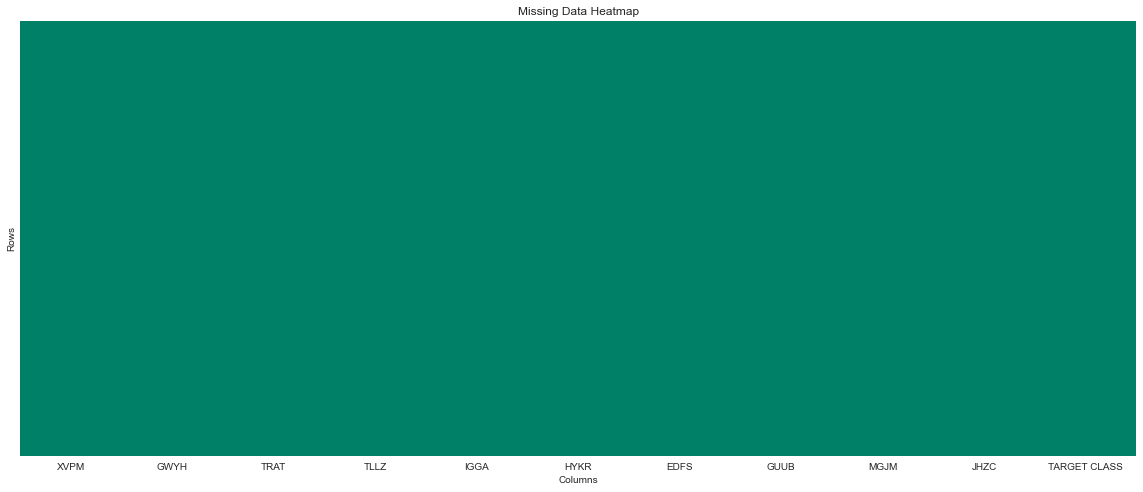

In [165]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### no missing values either

In [9]:
df.isnull().any()

XVPM            False
GWYH            False
TRAT            False
TLLZ            False
IGGA            False
HYKR            False
EDFS            False
GUUB            False
MGJM            False
JHZC            False
TARGET CLASS    False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [12]:
######################################################################
############## Part IV - EDA
######################################################################


In [166]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


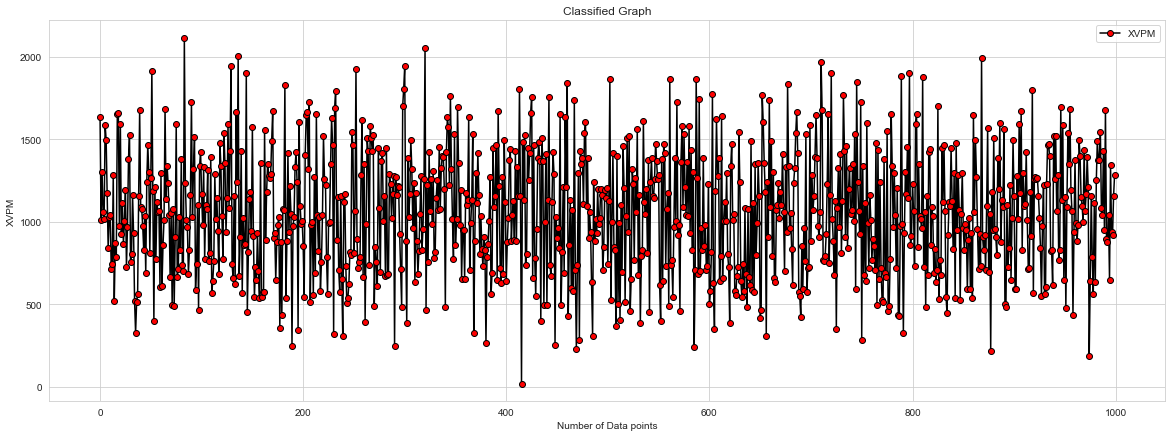

In [167]:
df['XVPM'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Classified Graph')

plt.xlabel('Number of Data points')

plt.ylabel('XVPM')


#### its going to be challenge to really makes sense of this data set because we are handling some classified data so we don't know what each columns mean

In [168]:
df.XVPM.mean()

1055.0711569701145

In [169]:
df.XVPM.std()

370.9801929632344

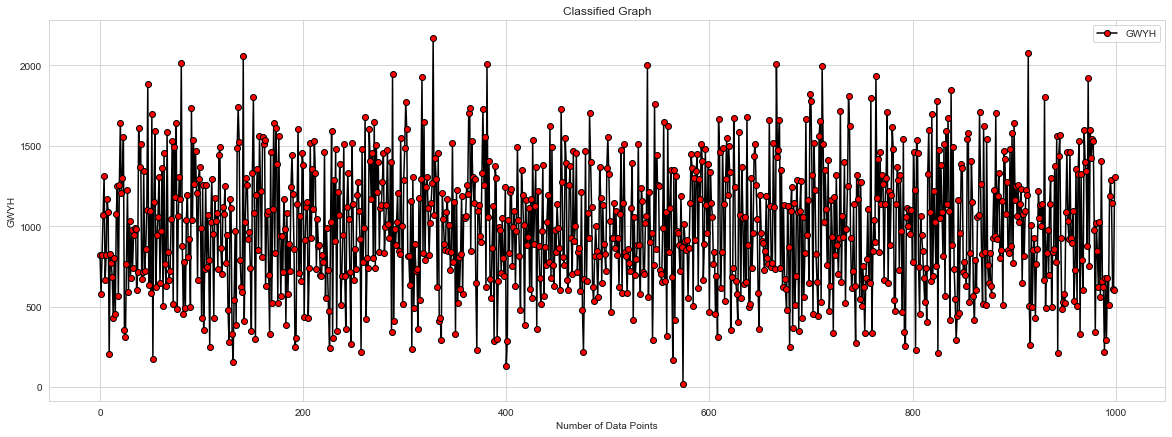

In [170]:
df['GWYH'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Classified Graph')

plt.xlabel('Number of Data Points')

plt.ylabel('GWYH')


#### again same issue with one here, mean seems to be same as the previous feature column
#### lets see the correlation and then go from there

In [171]:
corr = df.corr()

In [172]:
corr

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,1.000000,-0.004816,-0.014219,0.055256,0.003688,0.001883,-0.023526,0.032118,-0.016091,0.026222,-0.079896
GWYH,-0.004816,1.000000,-0.224859,0.121623,-0.104795,0.042529,-0.102221,0.061553,0.039728,0.105532,-0.416168
TRAT,-0.014219,-0.224859,1.000000,-0.037726,0.124870,0.005462,0.118736,-0.073203,-0.067177,-0.119816,0.489347
TLLZ,0.055256,0.121623,-0.037726,1.000000,-0.005545,-0.004792,-0.063989,0.053958,0.094121,0.065143,-0.172029
IGGA,0.003688,-0.104795,0.124870,-0.005545,1.000000,0.003631,0.076304,-0.042134,-0.011688,-0.066895,0.295390
HYKR,0.001883,0.042529,0.005462,-0.004792,0.003631,1.000000,-0.007452,0.004891,0.025553,-0.006403,-0.015266
EDFS,-0.023526,-0.102221,0.118736,-0.063989,0.076304,-0.007452,1.000000,-0.071361,0.005865,-0.047928,0.281607
GUUB,0.032118,0.061553,-0.073203,0.053958,-0.042134,0.004891,-0.071361,1.000000,0.011507,0.061170,-0.174496
MGJM,-0.016091,0.039728,-0.067177,0.094121,-0.011688,0.025553,0.005865,0.011507,1.000000,0.014342,-0.098887
JHZC,0.026222,0.105532,-0.119816,0.065143,-0.066895,-0.006403,-0.047928,0.061170,0.014342,1.000000,-0.301725


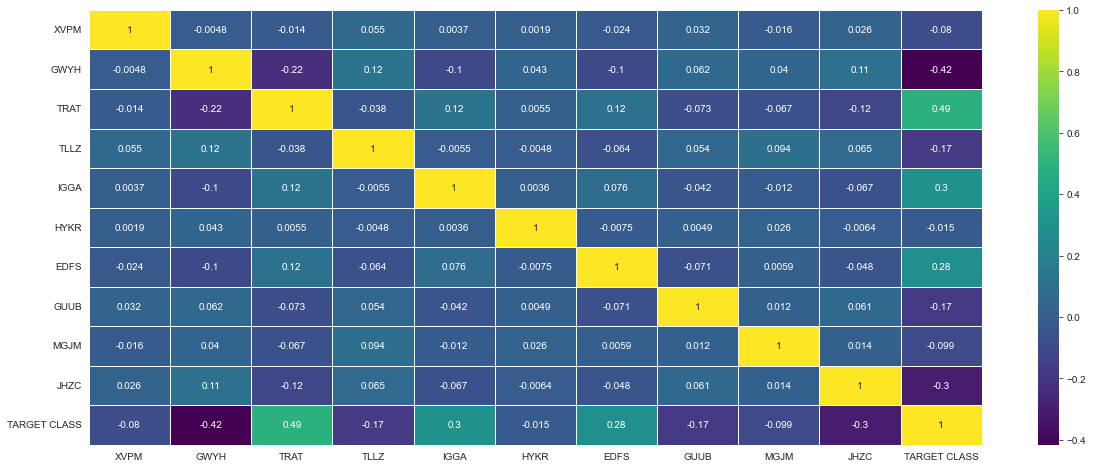

In [173]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(corr,ax=ax,linewidths=0.5,annot=True,cmap='viridis')


#### because we don't have much infomation about the data we will have to figure out a way to make sense of the data
#### for now we will only pay attention to three feature columns EDFS, TRAT and IGGA

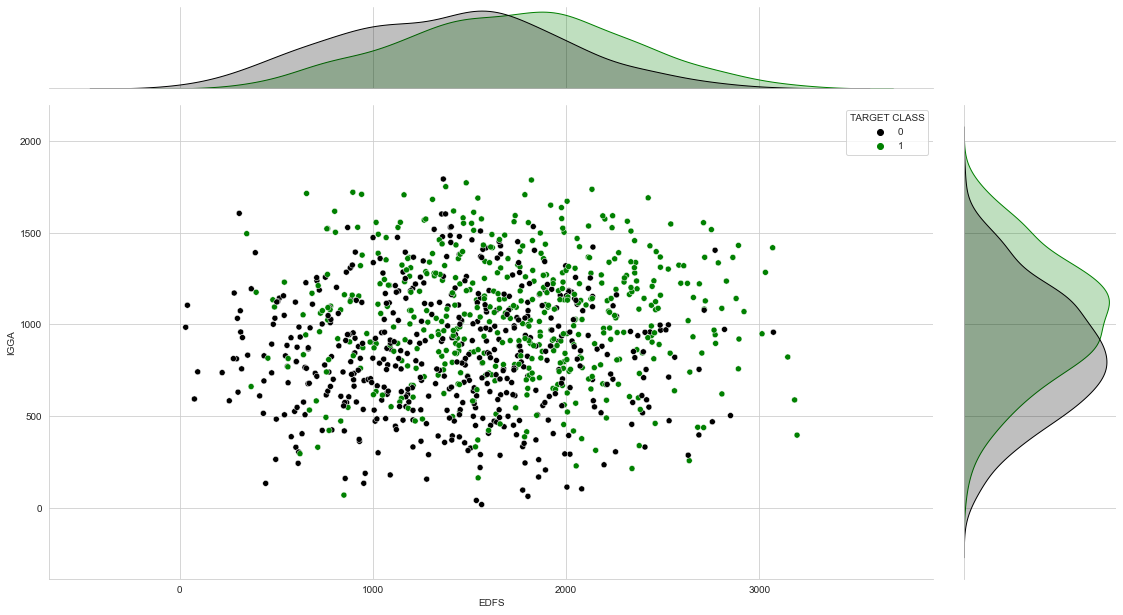

In [174]:
custom = {0:'black',
         1:'green'}

g = sns.jointplot(x=df.EDFS,y=df.IGGA,data=df,hue='TARGET CLASS',palette=custom)

g.fig.set_size_inches(17,9)


#### seems like the positive peaks around 2000 on EDFA scale and similar behavior at around 1000 on IGGA scale

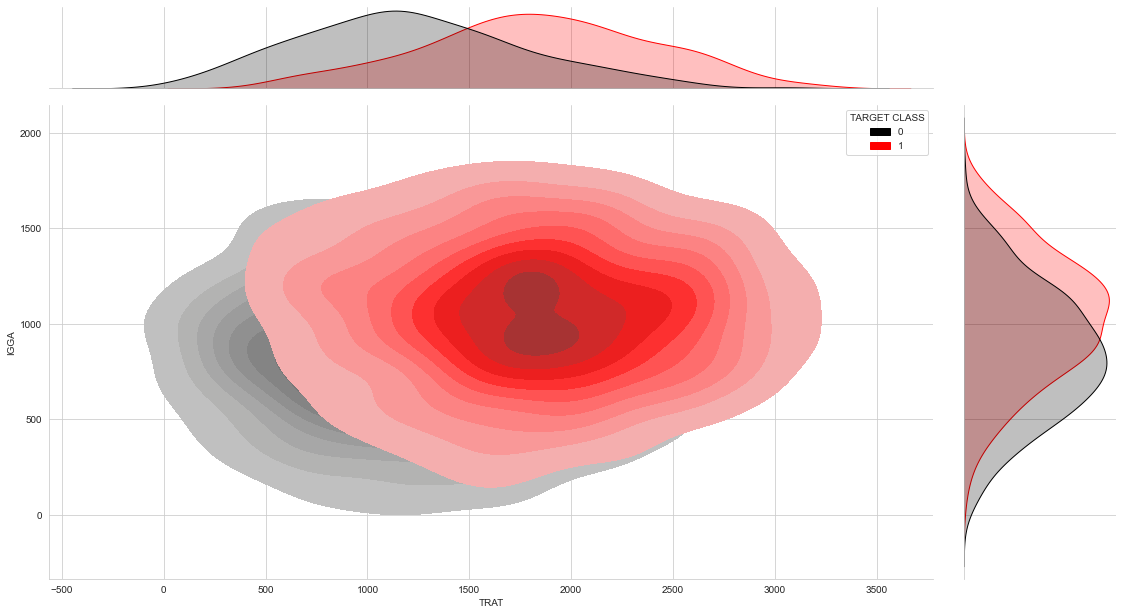

In [175]:
custom = {0:'black',
          1:'red'}

g = sns.jointplot(x=df.TRAT,y=df.IGGA,data=df,hue='TARGET CLASS',kind='kde',fill=True,palette=custom)

g.fig.set_size_inches(17,9)


#### we see our target range from this

In [176]:
#### the pearson should be very strong on this one lets check it out

from scipy.stats import pearsonr

In [177]:
co_eff,p_value = pearsonr(df.TRAT,df.IGGA)

In [178]:
p_value                          #### makes sense, obviously we reject the null hypothesis here

7.516870258267967e-05

In [179]:
co_eff,p_value = pearsonr(df['TRAT'],df['TARGET CLASS'])

In [180]:
p_value                          ##### same the case with this one which doesn't suprise me at all

2.4602673038286915e-61

In [181]:
co_eff                           #### almost like 0.50 correlation with both columns
                                 #### co_eff goes from 0-1, more closer to 1 means more correlation

0.4893472420411505

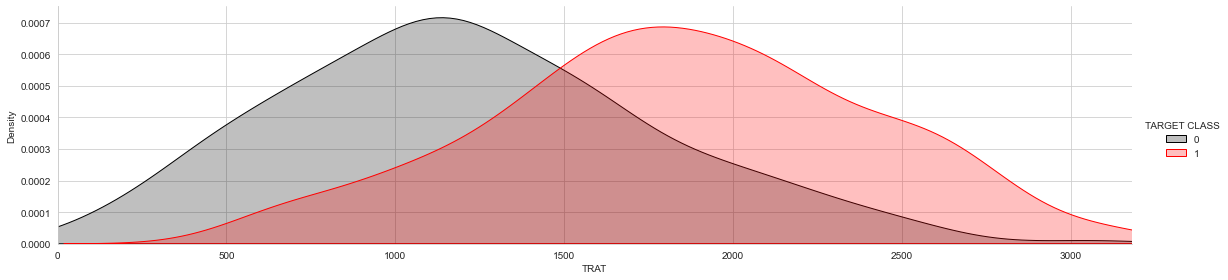

In [182]:
pl = sns.FacetGrid(df,hue='TARGET CLASS',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'TRAT',fill=True)

pl.set(xlim=(0,df.TRAT.max()))

pl.add_legend()


#### clearly we can see our target class peaks and low peaks

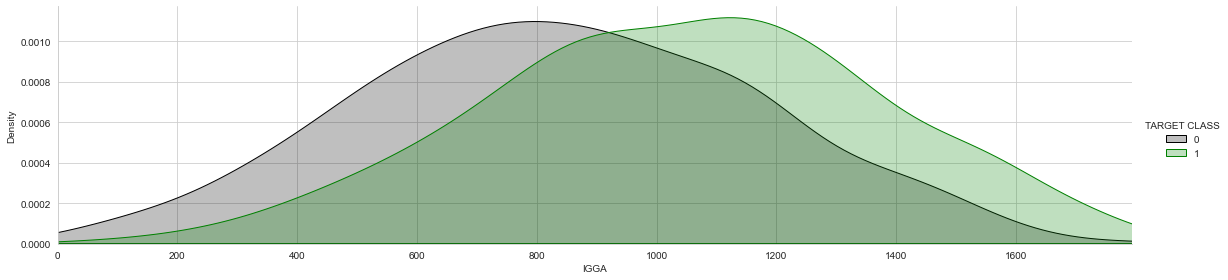

In [183]:
custom = {0:'black',
          1:'green'}

pl = sns.FacetGrid(df,hue='TARGET CLASS',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'IGGA',fill=True)

pl.set(xlim=(0,df.IGGA.max()))

pl.add_legend()


#### the peak for the target class on IGGA peaks around 1200

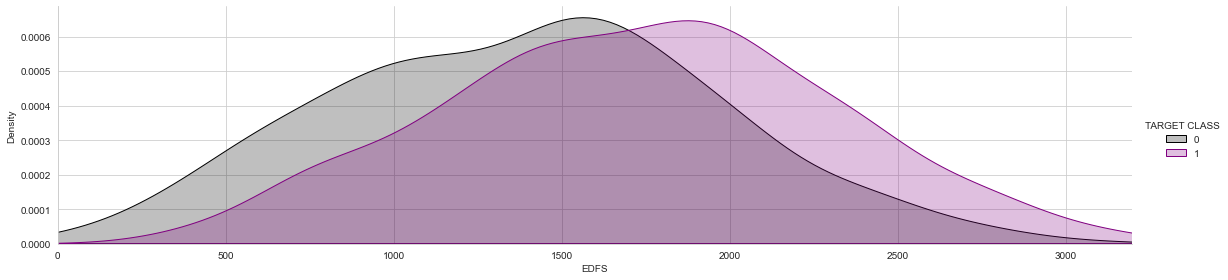

In [184]:
custom = {0:'black',
          1:'purple'}

pl = sns.FacetGrid(df,hue='TARGET CLASS',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'EDFS',fill=True)

pl.set(xlim=(0,df.EDFS.max()))

pl.add_legend()

#### positive spikes around 1800-2000 for feature column EDFS

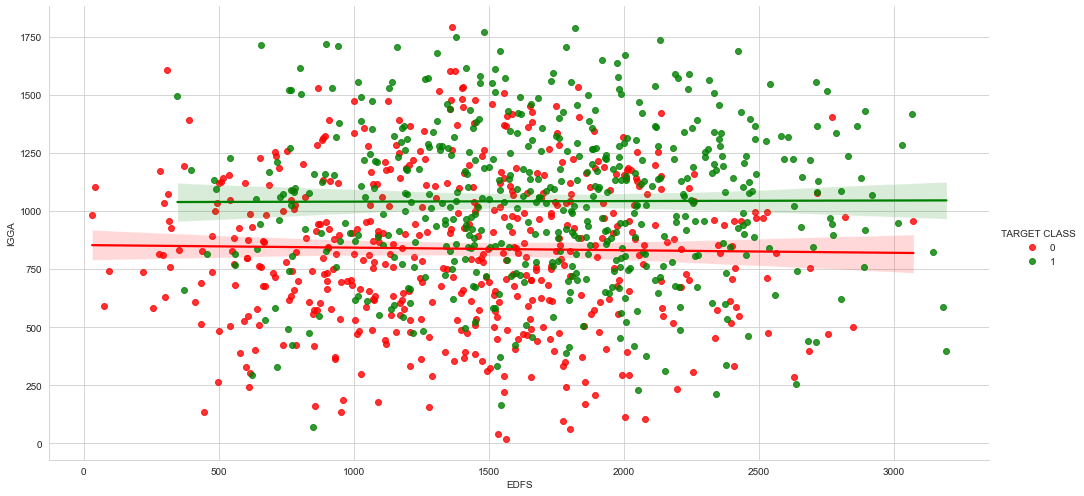

In [185]:
custom = {0:'red',
          1:'green'}

sns.lmplot(x='EDFS',y='IGGA',data=df,height=7,aspect=2,hue='TARGET CLASS',palette=custom)


#### not the best fit honestly

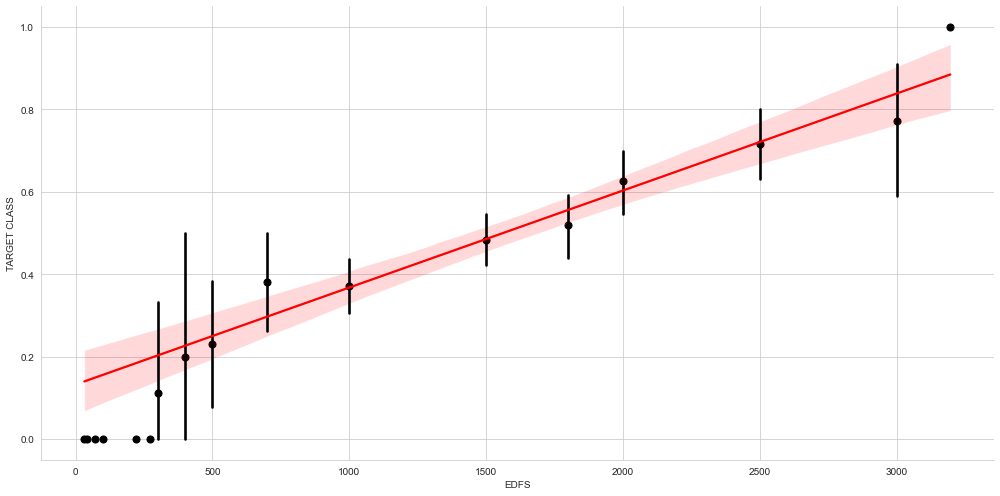

In [186]:
sns.lmplot(x='EDFS',y='TARGET CLASS',data=df,height=7,aspect=2,x_bins=[0,5,20,32,40,70,100,150,190,220,270,300,400,500,700,1000,1500,1800,2000,2500,3000,3196],line_kws={'color':'red'},scatter_kws={'color':'black'})

#### seems like a proper linear model

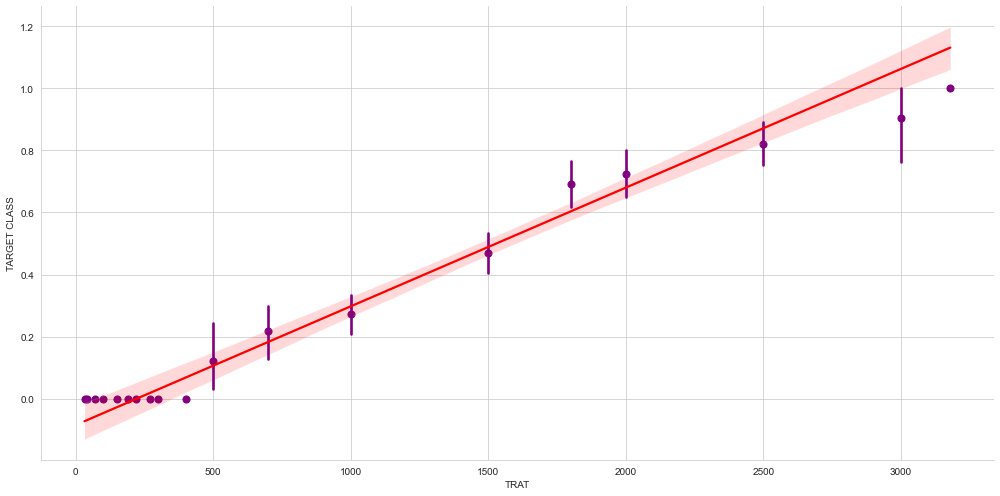

In [187]:
sns.lmplot(x='TRAT',y='TARGET CLASS',data=df,height=7,aspect=2,x_bins=[32,40,70,100,150,190,220,270,300,400,500,700,1000,1500,1800,2000,2500,3000,3180],line_kws={'color':'red'},scatter_kws={'color':'purple'})


#### similar case here we see, proper linear correlation

In [188]:
###################################################
########### PART V - PCA
###################################################

In [189]:
X = df.drop(columns='TARGET CLASS')

X.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


In [190]:
y = df['TARGET CLASS']

y.head()

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

In [191]:
from sklearn.preprocessing import StandardScaler

#### honestly this kind of data is the BEST type for PCA

In [192]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [193]:
from sklearn.decomposition import PCA

In [194]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
final_df = pd.concat([principal_df, y], axis=1)


In [195]:
final_df.head()

,principal_component_1,principal_component_2,TARGET CLASS
0,-1.583938,-0.436172,0
1,-2.009532,0.161765,1
2,0.796805,-1.826420,1
3,1.378793,1.380319,0
4,1.897855,0.341097,0


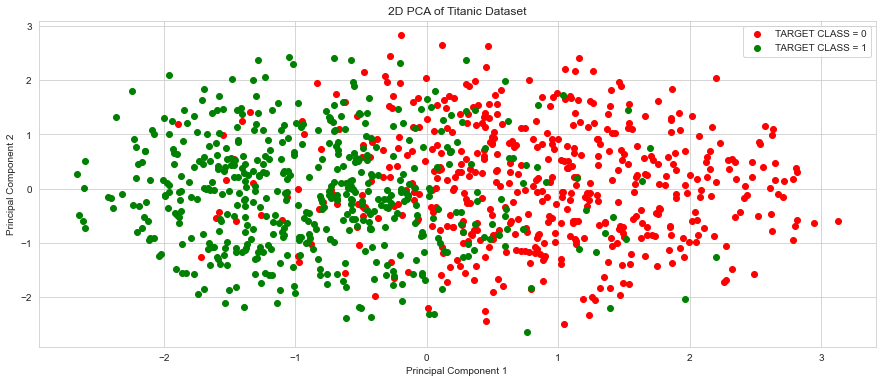

In [196]:
colors = {0: 'red', 1: 'green'}

plt.figure(figsize=(15, 6))

for i in final_df['TARGET CLASS'].unique():
    subset = final_df[final_df['TARGET CLASS'] == i]
    plt.scatter(subset['principal_component_1'], subset['principal_component_2'], 
                color=colors[i], label=f'TARGET CLASS = {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Titanic Dataset')
plt.legend()
plt.grid(True)

#### see how you can make cluster or classfication with perfection with this method


In [197]:
pca.n_features_

10

In [198]:
#### now lets say we were not provided the Target column and we wanted to cluster based on PCA so this is how you do it

X.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

In [199]:
df_comp = pd.DataFrame(pca.components_,columns=['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM','JHZC'])

In [200]:
df_comp.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,0.075774,0.493515,-0.493476,0.284463,-0.317943,0.039156,-0.338946,0.261404,0.160699,0.338529
1,-0.284477,0.019879,-0.186400,-0.604430,-0.411765,-0.171710,-0.151788,-0.043536,-0.541127,0.042528


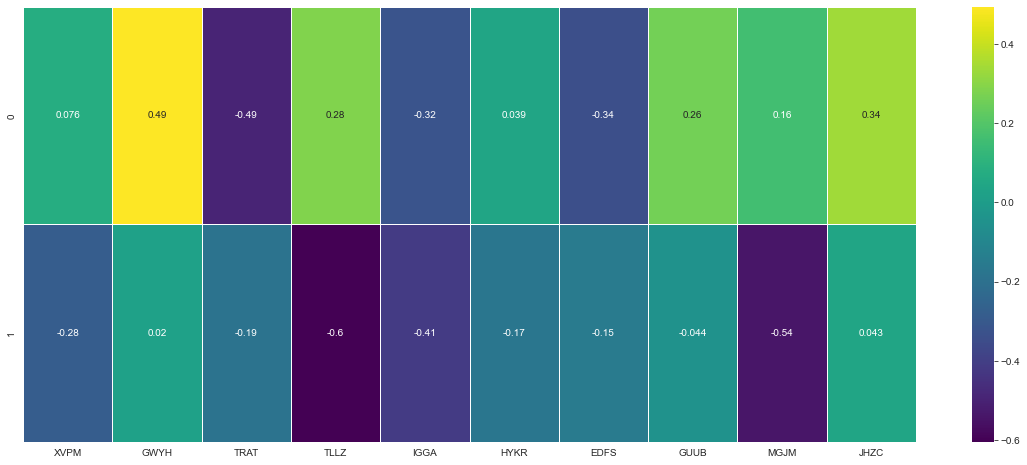

In [201]:
fig, ax = plt.subplots(figsize=(20,8))                     

sns.heatmap(df_comp,ax=ax,linewidths=0.5,annot=True,cmap='viridis')


#### if we are not given the target column this is how we can use it

In [202]:
#######################################################################
######################## Part VI - PCA Model
#######################################################################

In [203]:
final_df.head()

,principal_component_1,principal_component_2,TARGET CLASS
0,-1.583938,-0.436172,0
1,-2.009532,0.161765,1
2,0.796805,-1.826420,1
3,1.378793,1.380319,0
4,1.897855,0.341097,0


In [204]:
X = final_df.drop(columns='TARGET CLASS')

X.head()

,principal_component_1,principal_component_2
0,-1.583938,-0.436172
1,-2.009532,0.161765
2,0.796805,-1.826420
3,1.378793,1.380319
4,1.897855,0.341097


In [205]:
y = final_df['TARGET CLASS']

y.head()

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split


In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [208]:
from sklearn.linear_model import LogisticRegression         #### for classification

In [209]:
model = LogisticRegression()

In [210]:
model.fit(X_train,y_train)

LogisticRegression()

In [211]:
y_predict = model.predict(X_test)

In [212]:
from sklearn import metrics

In [213]:
print(metrics.classification_report(y_test,y_predict))            #### not a bad model honestly

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       146
           1       0.88      0.84      0.86       154

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [214]:
#############################################################################
################# PART VII - Classification
#############################################################################

In [215]:
df.head()                          #### we did the PCA models but now we will do the proper way of modelling

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [216]:
X = df.drop(columns='TARGET CLASS')

X.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


In [217]:
y = df['TARGET CLASS']

y.head()

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

In [218]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [219]:
X.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

In [220]:
preprocessor = ColumnTransformer(transformers=[
                                               ('num', StandardScaler(),['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM','JHZC'])
                                              ]
                                )


In [221]:
from sklearn.pipeline import Pipeline

In [222]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [224]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['XVPM', 'GWYH', 'TRAT',
                                                   'TLLZ', 'IGGA', 'HYKR',
                                                   'EDFS', 'GUUB', 'MGJM',
                                                   'JHZC'])])),
                ('classifier', LogisticRegression())])

In [225]:
y_predict = model.predict(X_test)

In [226]:
metrics.accuracy_score(y_test,y_predict)

0.84

In [227]:
print(metrics.classification_report(y_test,y_predict))             #### seems like PCA model was better then this

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       146
           1       0.86      0.82      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [228]:
from sklearn.ensemble import RandomForestClassifier                #### lets bring our boy random forest

In [229]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [230]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['XVPM', 'GWYH', 'TRAT',
                                                   'TLLZ', 'IGGA', 'HYKR',
                                                   'EDFS', 'GUUB', 'MGJM',
                                                   'JHZC'])])),
                ('classifier', RandomForestClassifier())])

In [231]:
y_predict = model.predict(X_test)

In [232]:
print(metrics.classification_report(y_test,y_predict))         #### interesingly it performed worst then logistic

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       146
           1       0.86      0.81      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [233]:
from sklearn.model_selection import GridSearchCV              #### time to go for advanced


In [234]:
%%time

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=2)
model_grid.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.2s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.2s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_s

[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.6s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_s

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=10, 

[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.6s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.0s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.2s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.1s
[CV] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=2, 

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.8s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.9s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classi

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=300; total time=   1.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classi

[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.2s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.0s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300; total time=   1.1s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, class

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.9s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.8s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   0.8s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10,

[CV] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=300; total time=   1.0s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, class

In [235]:
best_model = model_grid.best_estimator_

In [236]:
y_predict = best_model.predict(X_test)

In [237]:
metrics.accuracy_score(y_test,y_predict)                #### still not better then logistic

0.8333333333333334

In [238]:
###############################################
###### PART VIII - KNN
###############################################

In [239]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
%%time

k_range = range(1,100)

accuracy = []

for i in k_range:
    
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=i))
    ]) 
    
    model.fit(X_train,y_train)
    
    y_predict = model.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(y_test,y_predict))

Wall time: 5.07 s


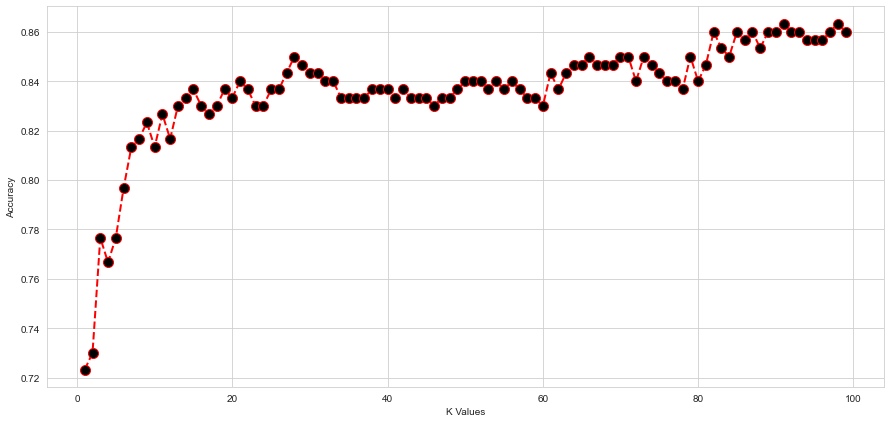

In [241]:
plt.figure(figsize=(15,7))

plt.plot(k_range,accuracy,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=10,markerfacecolor='black')

plt.xlabel('K Values')

plt.ylabel('Accuracy')

#### seems like we can achieve better with KNN if we increase the k value

In [242]:
%%time

k_range = range(90,200)

accuracy = []

for i in k_range:
    
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=i))
    ]) 
    
    model.fit(X_train,y_train)
    
    y_predict = model.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(y_test,y_predict))

Wall time: 7.9 s


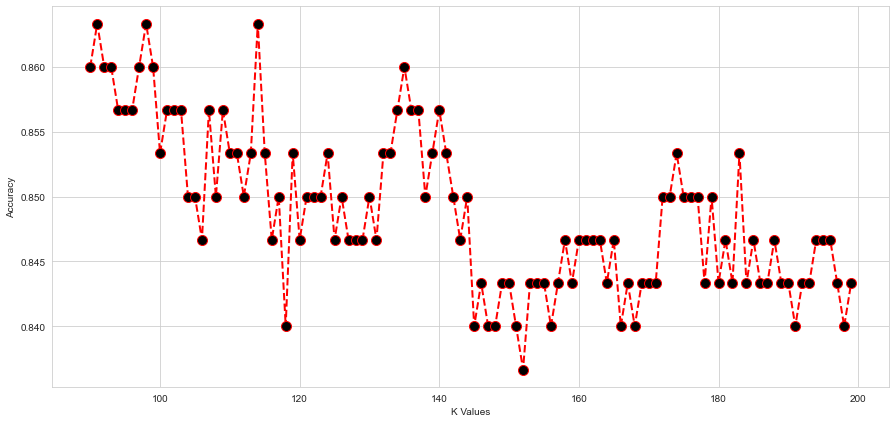

In [243]:
plt.figure(figsize=(15,7))

plt.plot(k_range,accuracy,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=10,markerfacecolor='black')

plt.xlabel('K Values')

plt.ylabel('Accuracy')

#### seems like 90-100 is the sweet spot and after that it degrades

In [244]:
%%time

k_range = range(90,100)

accuracy = []

for i in k_range:
    
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=i))
    ]) 
    
    model.fit(X_train,y_train)
    
    y_predict = model.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(y_test,y_predict))

Wall time: 507 ms


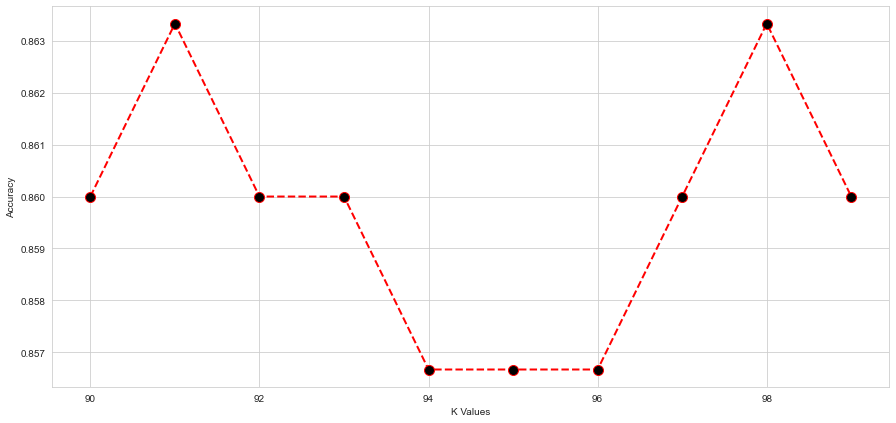

In [245]:
plt.figure(figsize=(15,7))

plt.plot(k_range,accuracy,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=10,markerfacecolor='black')

plt.xlabel('K Values')

plt.ylabel('Accuracy')

#### from the plot it seems k value 91 is our best shot

In [246]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=91))
    ]) 
    
model.fit(X_train,y_train)
    
y_predict = model.predict(X_test)
    

In [247]:
metrics.accuracy_score(y_test,y_predict)                    #### the best one yet

0.8633333333333333

In [248]:
print(metrics.classification_report(y_test,y_predict))      #### much better

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       146
           1       0.86      0.88      0.87       154

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



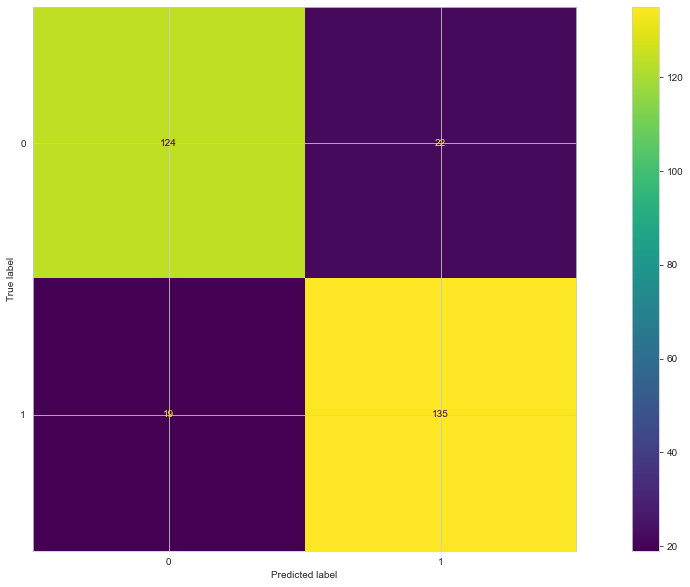

In [249]:
cm = metrics.confusion_matrix(y_test,y_predict)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(20,10))

disp.plot(ax=ax)


In [141]:
##############################################################################
################### PART IX - Advanced methods
##############################################################################

In [142]:
#### although our requirement is satisfied but it doesn't hurt to see if we can improve even further

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [143]:
import xgboost as xgb

In [144]:
clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9]
}

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
%%time

random_search_xgb = RandomizedSearchCV(clf_xgb, param_grid_xgb, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_xgb.fit(X_train, y_train)


Wall time: 1min 56s


In [147]:
best_model = random_search_xgb.best_estimator_

In [148]:
y_predict = best_model.predict(X_test)

In [149]:
metrics.accuracy_score(y_test,y_predict)

0.8266666666666667

In [150]:
print(metrics.classification_report(y_test,y_predict))          #### no improvement

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       146
           1       0.84      0.82      0.83       154

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [152]:
from sklearn.ensemble import StackingClassifier               #### one last try before we wrap it up

In [153]:
base_models = [
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [154]:
%%time

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', stacking_clf)
])

model.fit(X_train, y_train)


Wall time: 2.56 s


In [155]:
y_predict = model.predict(X_test)

In [156]:
metrics.accuracy_score(y_test, y_predict)

0.8433333333333334

In [157]:
print(metrics.classification_report(y_test,y_predict))               #### no improvement from here either

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       146
           1       0.86      0.82      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [158]:
#######################################################################################################################
#### We conducted extensive EDA, PCA, and classification modeling on a classified dataset. ############################
#### The restricted knowledge of column meanings limited our ability to perform a more in-depth EDA. ##################
#### Despite this constraint, we tested several classification models, ################################################
#### with KNN achieving the highest accuracy of 0.86. #################################################################
#######################################################################################################################

